In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Our Data
seeds = pd.read_csv('class_seeds.csv')

In [4]:
seeds.head()

,Area,Perimeter,Compactness,KernelLength,KernelWidth,AsymCoeff,KernelGrov_Length,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


<AxesSubplot:xlabel='Class', ylabel='count'>

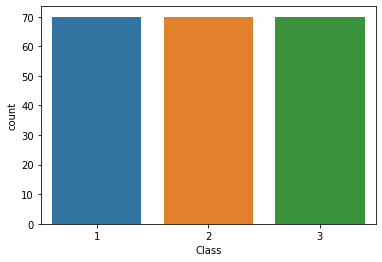

In [6]:
sns.countplot(x='Class',data=seeds)

In [7]:
seeds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               210 non-null    float64
 1   Perimeter          210 non-null    float64
 2   Compactness        210 non-null    float64
 3   KernelLength       210 non-null    float64
 4   KernelWidth        210 non-null    float64
 5   AsymCoeff          210 non-null    float64
 6   KernelGrov_Length  210 non-null    float64
 7   Class              210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [8]:
seeds.isna().sum()

Area                 0
Perimeter            0
Compactness          0
KernelLength         0
KernelWidth          0
AsymCoeff            0
KernelGrov_Length    0
Class                0
dtype: int64

In [9]:
#Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

In [11]:
X = seeds.drop('Class',axis=1)
y =  seeds['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
X_train.shape

(168, 7)

In [14]:
X_test.shape

(42, 7)

In [16]:
y_train.shape

(168,)

In [17]:
#we create a simple model for our Classification
seed_model =  LogisticRegression()
seed_model.fit(X_train, y_train)

C:\Users\user pc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
seed_predictions = seed_model.predict(X_test)

In [21]:
#Model Evaluation
#classification_report,confusion_matrix
print(classification_report(y_test,seed_predictions))
print(confusion_matrix(y_test,seed_predictions))

              precision    recall  f1-score   support

           1       0.82      0.82      0.82        11
           2       1.00      1.00      1.00        14
           3       0.88      0.88      0.88        17

    accuracy                           0.90        42
   macro avg       0.90      0.90      0.90        42
weighted avg       0.90      0.90      0.90        42

[[ 9  0  2]
 [ 0 14  0]
 [ 2  0 15]]
